2) Salary_hike -> Build a prediction model for Salary_hike.

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.shape

(30, 2)

In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data.nunique()

YearsExperience    28
Salary             30
dtype: int64

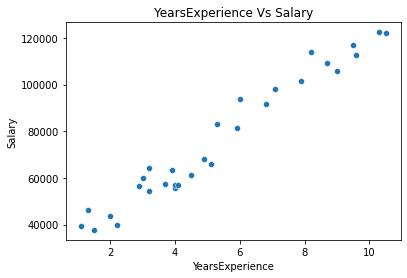

In [9]:
sns.scatterplot('YearsExperience','Salary',data=data)
plt.title('YearsExperience Vs Salary')
plt.show()

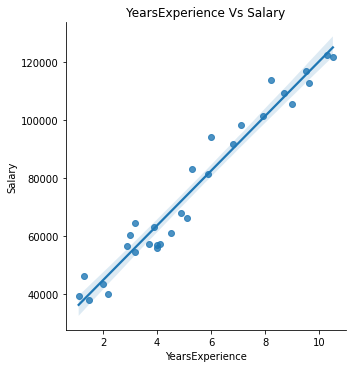

In [11]:
sns.lmplot('YearsExperience','Salary',data=data)
plt.title('YearsExperience Vs Salary')
plt.show()

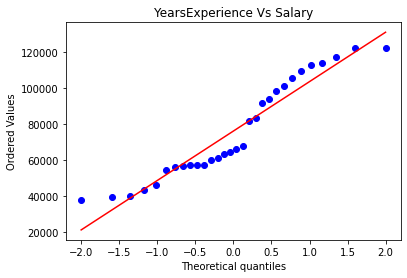

In [13]:
stats.probplot(data['Salary'],dist='norm',plot=plt)
plt.title('YearsExperience Vs Salary')
plt.show()

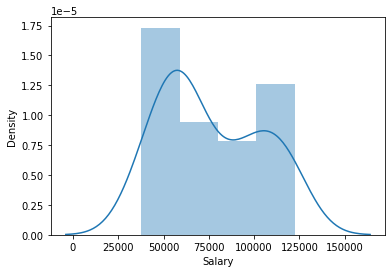

In [14]:
sns.distplot(a=data['Salary'],hist=True)
plt.show()

In [15]:
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [16]:
data.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

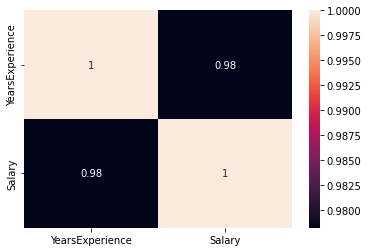

In [17]:
corr_matrix=data.corr()
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

**Model Building**

In [20]:
import statsmodels.formula.api as smf

In [21]:
model=smf.ols('Salary ~ YearsExperience',data=data).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        08:51:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Predict for new data points
newdata=pd.Series([2.9,15.9,6.8,5.14,10.11,12.33])

In [26]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])
model.predict(data_pred)

0     53197.090931
1    176046.601110
2     90051.943985
3     74365.006531
4    121331.319269
5    142310.235622
dtype: float64